# Graph creation

In [60]:
def graph_from_edges(edges):
    """ undirected graph from a list of edges
    
    >>> g=graph_from_edges(((1,2),(3,4),(3,1),(1,7))); g
    {1: [2, 3, 7], 2: [1], 3: [4, 1], 4: [3], 7: [1]}
    """
    d = {}
    for i,j in edges:
        try:
            d[i].append(j)
        except(KeyError):
            d[i]=[j]
        try:
            d[j].append(i)
        except(KeyError):
            d[j]=[i]
    return d        

def is_adjacent(d,i,j):
    """ checking whether (i,j) is an edge
    
    >>> g=graph_from_edges(((1,2),(3,4),(3,1),(1,7)))
    >>> is_adjacent(g,1,2)
    True
    >>> is_adjacent(g,1,4)
    False
    >>> 
    """
    try:
        r = j in d[i]
    except (KeyError):
        return False
    return r

import doctest
doctest.run_docstring_examples(graph_from_edges, globals())
doctest.run_docstring_examples(is_adjacent, globals())


# Shortest paths and connectivity

In [54]:
def shortest_d(d,i,j):
    """ computing the shorted distance between i and j in d
  
    >>> g=graph_from_edges(((1,2),(3,4),(3,1),(1,7)))
    >>> shortest_d(g,1,1)
    0
    >>> shortest_d(g,1,2)
    1
    >>> shortest_d(g,1,4)
    2
    >>> shortest_d(g,4,1)
    2
    >>> shortest_d(g,4,888)
    -1
    
    """
    que=[]   # the queue for vertices
    inque={} # marking processed vertices
    for v in d.keys():
        inque[v]=-1
    que.append(i)
    inque[i]=0
    head=0
    dist = 0
    if i==j:
        return 0
    while head<len(que):
        #print(que,inque)
        
        v = que[head]
        dist = inque[v]+1
        head += 1
        #print ("v=",v)
        for u in d[v]:       # looping through neighbours of u
            #print ("u=",u)
            if u == j:       # found j at distance dist
                return dist
            if inque[u] < 0: # not seen before
                que.append(u)
                inque[u] = dist
    return -1

def is_connected(g):
    """
    a quick and dirty and slow test for connectivity
    """
    for v in g.keys():
        for u in g[v]:
            if shortest_d(g,v,u)<0:
                return False
    return True


import doctest
doctest.run_docstring_examples(shortest_d, globals())

# Homework 1.

* Write a function computing the distance matrix of a graph.
Do not simply call shortest_d in a loop, this is slow!
(hint - look what you get in inque)

* change code in shortest_d to make is_connected() efficient

In [3]:
g=graph_from_edges(((1,2),(3,4),(3,1),(1,7))); g

{1: [2, 3, 7], 2: [1], 3: [4, 1], 4: [3], 7: [1]}

In [21]:
g.keys()

[1, 2, 3, 4, 7]

In [20]:
import networkx as nx

In [21]:
petersen = nx.petersen_graph()

In [24]:
gg=graph_from_edges(petersen.edges())
shortest_d(gg,1,7)

2

# Homework 2.
Install and explore networkx
Try calling our functions on graphs produced by networkx generators

In [25]:
import matplotlib.pyplot as plt

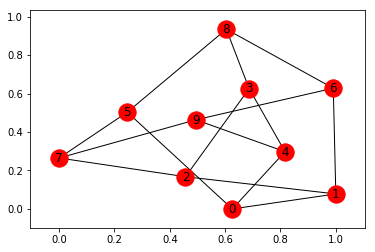

In [30]:
nx.draw_networkx(petersen)

# Kruskal's algorithm

In [37]:
def edges(d):
    """get the edges of the graph
    
    >>> g=graph_from_edges(((1,2),(3,4),(3,1),(1,7)))
    >>> set(edges(g))==set([(1, 2), (3, 4), (1, 3), (1, 7)])
    True
    """
    e =[]
    for v in d.keys():
        for u in d[v]:
            if v<u:
                e.append((v,u))
    return e

import doctest
doctest.run_docstring_examples(edges, globals())

In [58]:
def kruskal(g):
    """
    a spanning tree of a connected g, 
    minimal w.r.t. the ordering of edges given by edges()
    
    >>> import networkx as nx
    >>> petersen = nx.petersen_graph()
    >>> p=graph_from_edges(petersen.edges())
    >>> is_connected(graph_from_edges(kruskal(p)))
    True
    """
    
    t = []
    f = {} # forest
    for v in g.keys():
        f[v]=v
    for u,v in edges(g):  # u<v
        if f[u] != f[v]:
            m = min(f[u],f[v])
            for w in g.keys(): # very inefficient (bad!)
                if f[w]==f[u] or f[w]==f[v]:
                    f[w] = m
            t.append((u,v))
    return t

import doctest
doctest.run_docstring_examples(kruskal, globals())

# Homework 3.
How can one improve kruskal() to make subtree merging fast
(the loop marked "bad!" in the code)?